重回帰分析の重み式

$$\boldsymbol{w} = ({X}^{T}{X})^{-1}{X}^{T}{y}%|$$

- ベクトルの定義
- 行列の定義
- 転置
- 逆行列
- 行列積

In [3]:
import numpy as np

In [4]:
x = np.array([[1],[2],[3]])

In [6]:
print(x)

[[1]
 [2]
 [3]]


In [7]:
X = np.array([[1,2],[3,4]])
print(X)

[[1 2]
 [3 4]]


In [8]:
#転置
Xt = X.T
print(Xt)

[[1 3]
 [2 4]]


In [9]:
# 逆行列
# linear algebra: 線形代数

X_inv = np.linalg.inv(X)
print(X_inv)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [10]:
# 行列積
XX_inv = np.dot(X,X_inv)
print(XX_inv)

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [45]:
X = np.array([[1,2,3],[1,2,5],[1,3,4],[1,5,9]])
y = np.array([[1],[5],[6],[8]])

In [46]:
print(X)

[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]


In [47]:
print(y)

[[1]
 [5]
 [6]
 [8]]


In [48]:
Xt = X.T
XXt = np.dot(Xt,X)
X_inv = np.linalg.inv(XXt)
print(X_inv)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]


In [51]:
print(Xt.shape)
print(y.shape)
Xty = np.dot(Xt,y)
print(Xty)

(3, 4)
(4, 1)
[[ 20]
 [ 70]
 [124]]


In [55]:
print(X_inv)
print(Xty)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]
[[ 20]
 [ 70]
 [124]]


In [56]:
w = np.dot(X_inv,Xty)
print(w)

[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]


## Scikit-learnで実装

In [59]:
import sklearn

In [61]:
# 重回帰分析のみ読み込み
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression()

In [63]:
model.fit(X,y)

LinearRegression()

In [64]:
model.coef_

array([[0.        , 0.71428571, 0.57142857]])

In [65]:
model.intercept_

array([-0.14285714])

In [66]:
# 予測精度
model.score(X,y)

0.6923076923076923

In [67]:
X = np.array([[1,2,3]])

In [68]:
model.predict(X)

array([[3.]])

In [69]:
import pandas as pd
data = pd.read_csv('housing.csv')

In [70]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
len(data)

506

In [74]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 分布の確認

In [77]:
import seaborn as sns

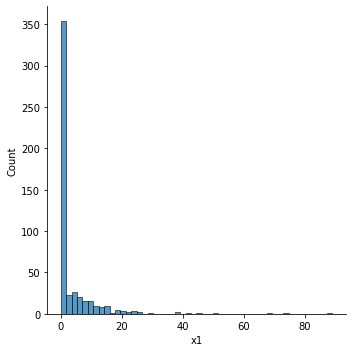

In [87]:
sns.displot(data['x1'],bins=50)

## 相関係数の確認

In [88]:
data.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


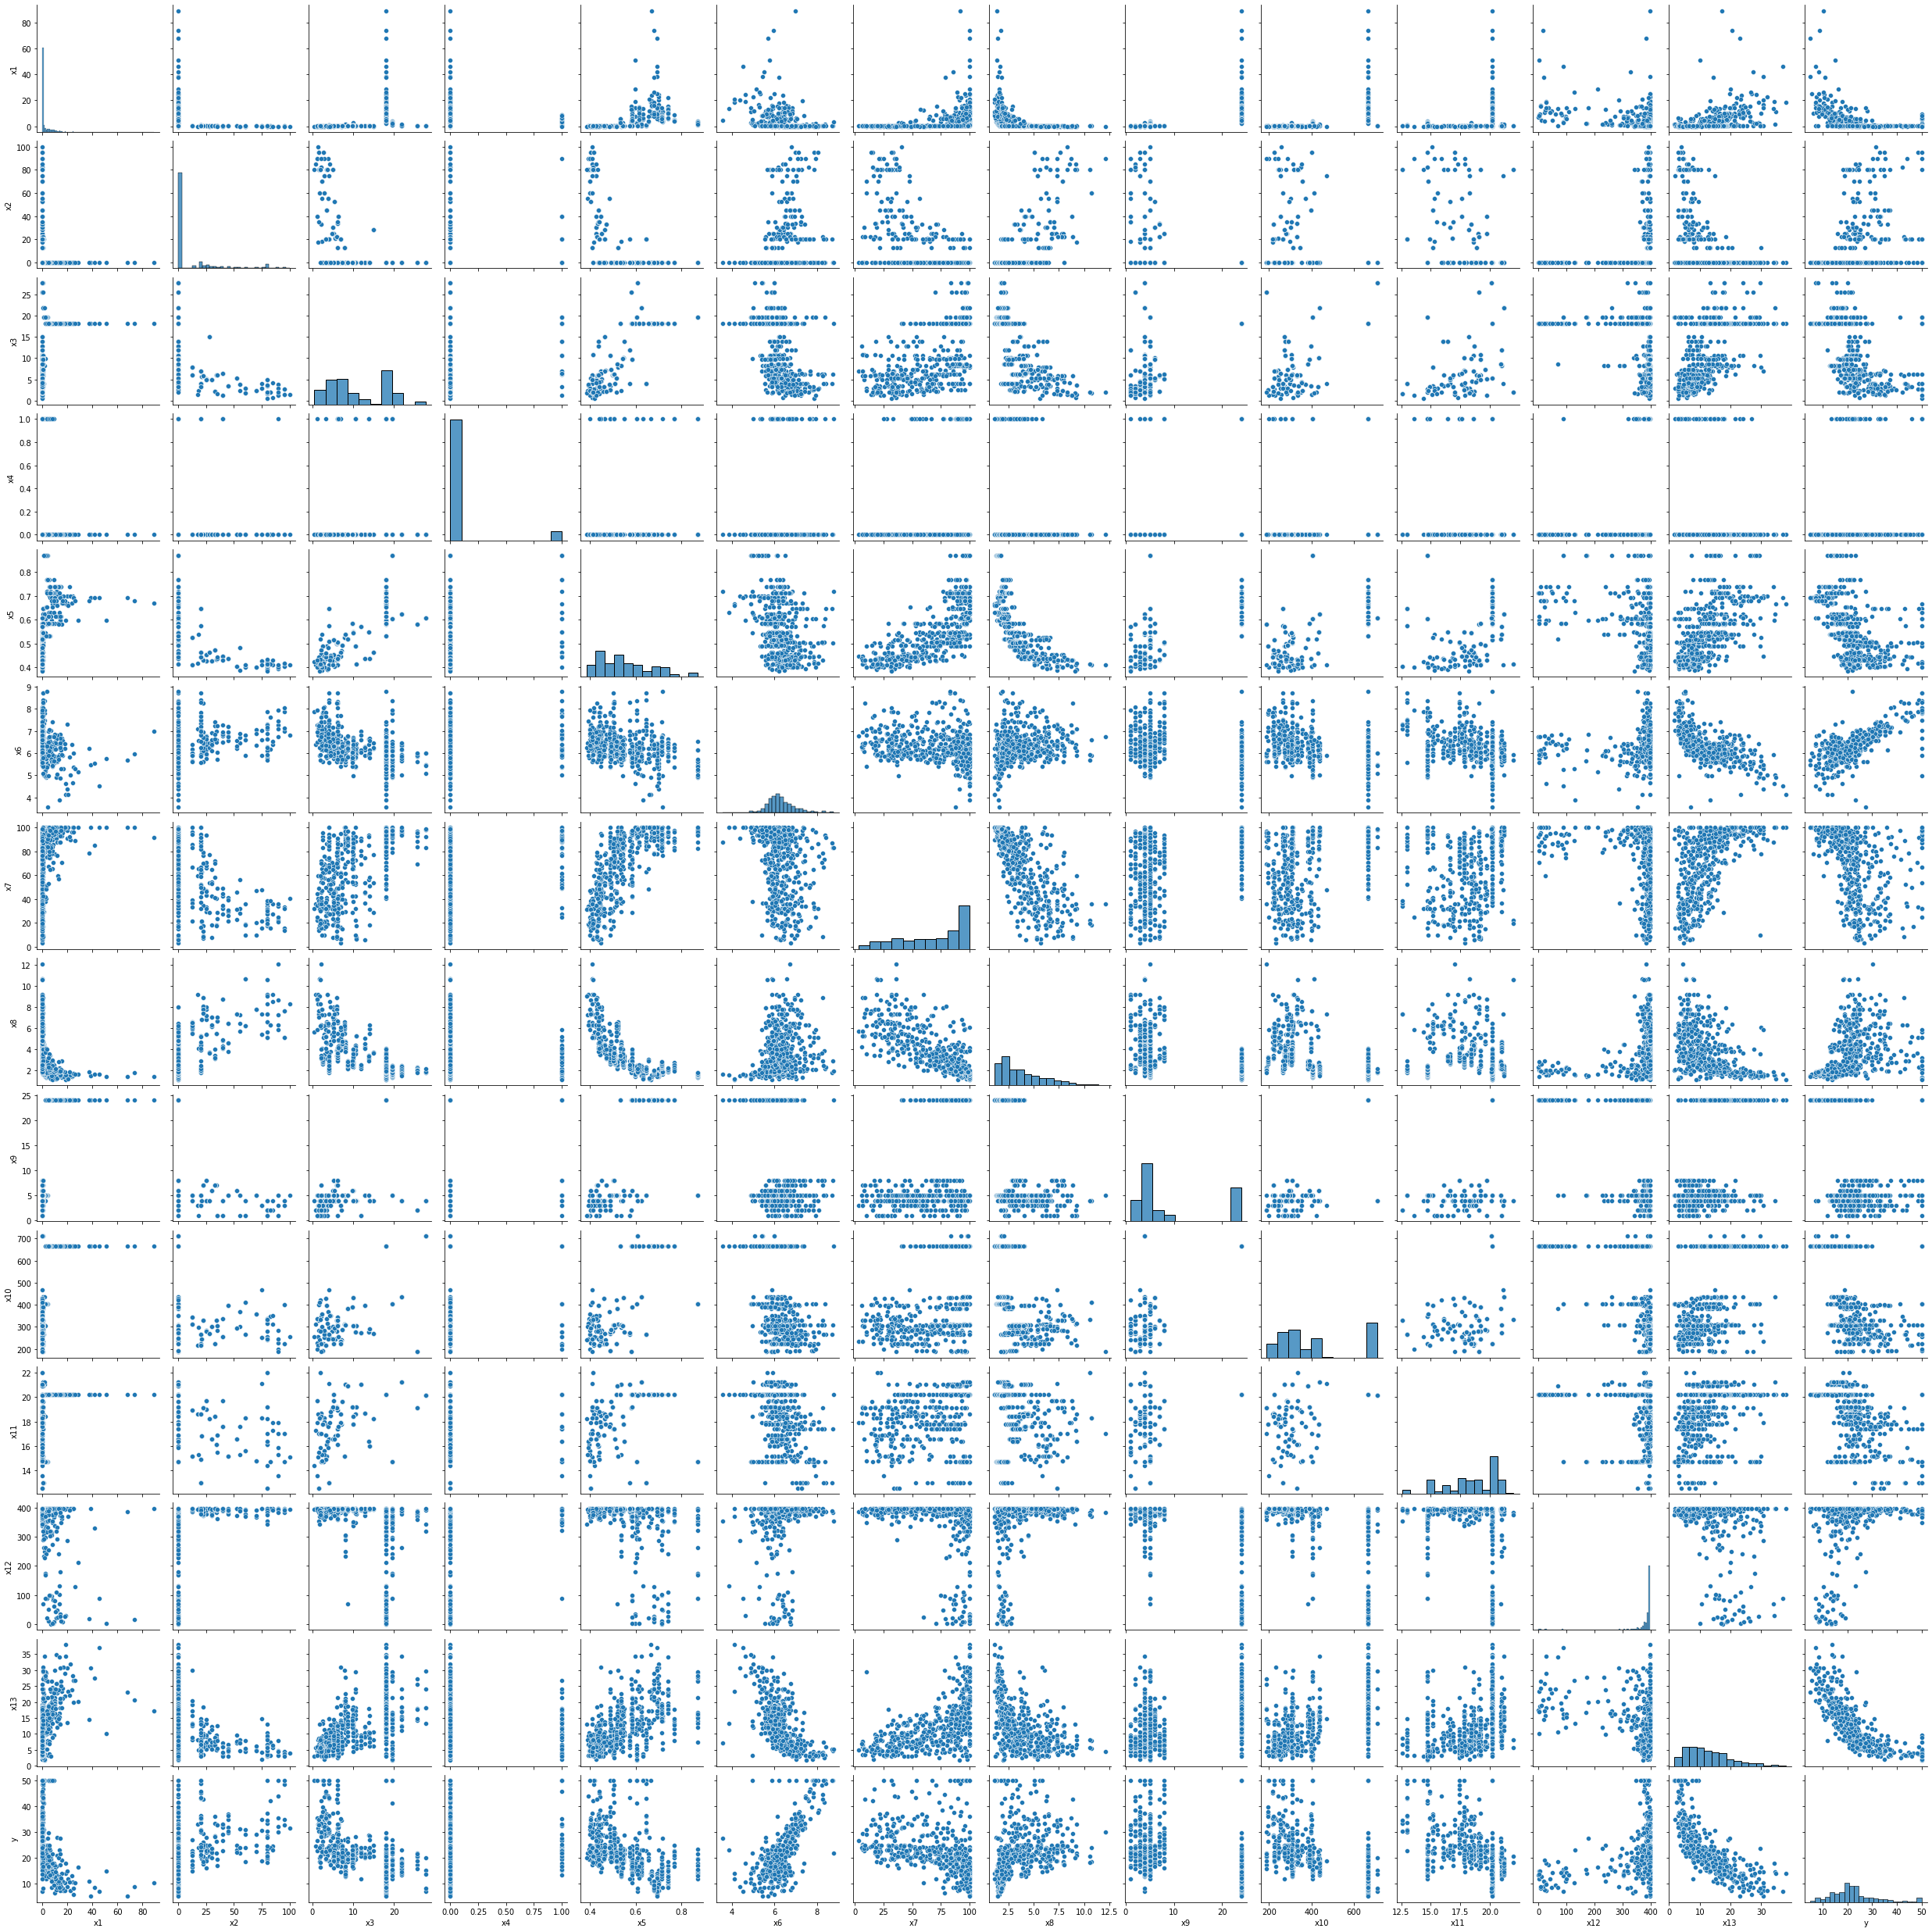

In [89]:
sns.pairplot(data)

## 入力変数と出力変数の切り分け

In [90]:
data.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [91]:
data.iloc[0,0]

0.00632

In [93]:
y = data.iloc[:,-1]

In [95]:
X = data.iloc[:,:-1]

In [96]:
# モデルの構築と検証

In [97]:
model = LinearRegression()

In [98]:
model.fit(X,y)

LinearRegression()

In [99]:
model.score(X,y)

0.7406426641094094

In [100]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=1)

In [111]:
model.fit(X_train,y_train)

LinearRegression()

In [112]:
model.score(X_test,y_test)

0.7786386580298919

In [113]:
model.score(X_train,y_train)

0.7349213043169354

In [116]:
x = X.iloc[0,:]
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [118]:
y_pred = model.predict([x])
y_pred

array([29.92520988])

## モデルの保存

In [122]:
import joblib

In [123]:
joblib.dump(model, 'model.pk')

['model.pk']

## モデル読み込み

In [125]:
model_new = joblib.load('model.pk')

In [127]:
model_new.predict([x])


array([29.92520988])

## パラメータの確認


In [129]:
#パラメータwの値
model.coef_

array([-1.16259926e-01,  5.56061815e-02,  2.42066570e-03,  2.58498034e+00,
       -1.91474547e+01,  3.54362973e+00, -5.86296897e-04, -1.59321860e+00,
        3.16227116e-01, -1.20965602e-02, -9.20798781e-01,  8.75217941e-03,
       -5.18191990e-01])

In [131]:
np.set_printoptions(precision=2,suppress=True)

In [132]:
model.coef_

array([ -0.12,   0.06,   0.  ,   2.58, -19.15,   3.54,  -0.  ,  -1.59,
         0.32,  -0.01,  -0.92,   0.01,  -0.52])

In [134]:
col = 'x6'

In [135]:
mean = data.mean()

In [136]:
mean[col]

6.284634387351779

In [137]:
sigma = data.std()

In [138]:
sigma[col]

0.7026171434153233

In [140]:
low = mean[col] - 3*sigma[col]
low

4.176782957105809

In [143]:
high = mean[col] + 3*sigma[col]
high

8.392485817597748

In [144]:
len(data)

506

In [145]:
data2 = data[(data[col]>low) & (data[col]<high)]

In [146]:
len(data2)

498

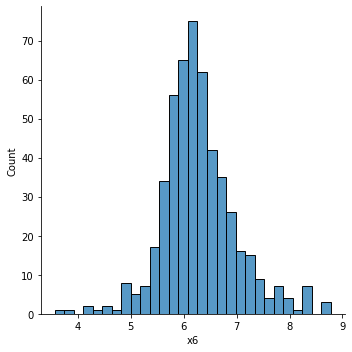

In [147]:
sns.displot(data['x6'])

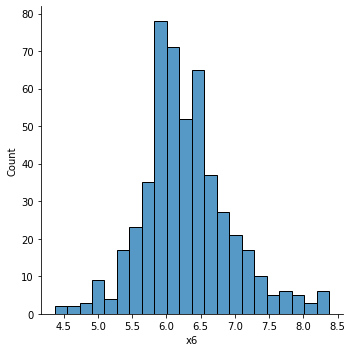

In [148]:
sns.displot(data2['x6'])

In [149]:
cols = data.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [154]:
_data = data
for col in cols:
    #3シグマの上下限値を設定
    low = mean[col]-3*sigma[col]
    high = mean[col]+3*sigma[col]
    _data = _data[(_data[col]>low)&(_data[col]<high)]
    

In [155]:
len(data)

506

In [156]:
len(_data)

415

In [157]:
_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [158]:
X = _data.iloc[:,:-1]
y = _data.iloc[:,-1]

In [159]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.5, random_state=42)

In [186]:
moel = LinearRegression()

In [187]:
model.fit(X_train,y_train)

LinearRegression()

In [188]:
model.score(X_train,y_train)

0.7532456096118785

In [189]:
model.score(X_test,y_test)

0.7080320044607783

In [190]:
# スケーリング

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()

In [193]:
# scalerの学習 ⇦ 平均と標準偏差を計算
# testデータは使わない
scaler.fit(X_train)

StandardScaler()

In [194]:
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [195]:
X_train2

array([[-0.5 ,  3.24, -1.25, ..., -1.75, -0.09, -1.14],
       [-0.5 , -0.47, -1.07, ..., -0.35,  0.43, -1.03],
       [ 0.99, -0.47,  1.11, ...,  0.77, -5.13,  1.34],
       ...,
       [-0.46, -0.47, -0.11, ..., -0.07,  0.38, -0.7 ],
       [ 1.95, -0.47,  1.11, ...,  0.77, -1.51,  0.23],
       [-0.48, -0.47, -0.31, ...,  1.1 ,  0.42,  0.91]])

In [196]:
X_test2

array([[-0.48,  0.85, -0.82, ...,  0.54,  0.33, -0.85],
       [-0.07, -0.47,  1.33, ..., -1.8 , -3.78,  0.61],
       [-0.49,  1.92, -1.07, ..., -1.57,  0.39, -0.88],
       ...,
       [-0.48,  1.12, -0.85, ..., -0.91,  0.03, -1.1 ],
       [-0.33, -0.47,  1.67, ...,  1.24,  0.44,  0.86],
       [-0.07, -0.47,  1.33, ..., -1.8 , -2.06,  0.48]])

In [197]:
model = LinearRegression()

In [199]:
model.fit(X_train2,y_train)

LinearRegression()

In [200]:
model.score(X_train2,y_train)

0.7532456096118785

In [201]:
model.score(X_test2,y_test)

0.7080320044607785

In [204]:
model.coef_

array([-0.37, -0.16,  0.37, -0.  , -1.19,  4.08, -0.79, -2.06,  1.51,
       -1.79, -2.12,  0.21, -2.16])

In [203]:

np.set_printoptions(precision=2,suppress=True)

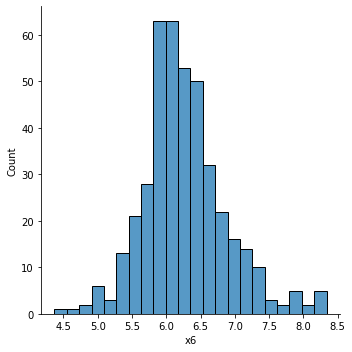

In [207]:
sns.displot(_data['x6'])